<a href="https://colab.research.google.com/github/gundasai/general/blob/master/Copy_of_14_Unet_Depth_2%2BAug_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semantic Segmentation using Covolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
keras.backend.clear_session()

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


## Reproducibiity

In [ ]:
import keras
import numpy as np
import random
import tensorflow as tf

keras.backend.clear_session()
random.seed(42)
np.random.seed(42)
#tf.set_random_seed(42)

### Importing the  Library Functions

In [ ]:
from keras.layers import *
import keras
from keras.models import Sequential,Model
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
!pip install medpy
from medpy.metric import dc, precision, recall,jc
#!pip install -U scipy==1.2.0
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

     |████████████████████████████████| 153kB 2.7MB/s 
     |████████████████████████████████| 44.9MB 72kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp36-cp36m-linux_x86_64.whl size=753442 sha256=b6e82d7eff470d46e0d2d4592599cab95622741da1ecdfc64c6be9578f1420b2
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [ ]:
#!pip install -U scipy==1.2.0
#from scipy.misc import imsave

### Loading Data

In [ ]:
#import os
#os.getcwd()
import os 
os.chdir('/content/drive/My Drive//datasets/dataset')
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1UdaOejRhEeeMQGXLjtSw0puIg-j1BFAP/dataset


In [ ]:
!pip install --quiet nibabel
import nibabel as nib
import matplotlib.pylab as plt
import numpy as np
import os

In [ ]:
trainx=[]
trainy=[]
for i in range(1,4):
  img=nib.load(os.path.join('/content/drive/My Drive/imagesTr/','iseg_' + str(i) + '_0000.nii.gz')).get_data()
  trainx.append(img)
  img=nib.load(os.path.join('/content/drive/My Drive/imagesTr/','iseg_' + str(i) + '_0001.nii.gz')).get_data()
  trainx.append(img)
  img=nib.load(os.path.join('/content/drive/My Drive/labelsTr/','iseg_' + str(i) + '.nii.gz')).get_data()
  trainy.append(img)
  trainy.append(img)
import numpy as np
trainx=np.array(trainx)
trainx=trainx[0:14,10:138,30:174,100:228]
trainy=np.array(trainy)
trainy=trainy[0:14,10:138,30:174,100:228]
validx=trainx
validy=trainy
testx=trainx
testy=trainy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going

In [ ]:
print(len(trainx))
print(len(trainy))
print(trainx.shape)
print(trainy.shape)

print(len(validx))
print(len(validy))
print(validx.shape)
print(validy.shape)

print(len(testx))
print(len(testy))
print(testx.shape)
print(testy.shape)

6
6
(6, 128, 144, 128)
(6, 128, 144, 128)
6
6
(6, 128, 144, 128)
(6, 128, 144, 128)
6
6
(6, 128, 144, 128)
(6, 128, 144, 128)


In [ ]:
print(trainy[0,:,:,20])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
"""print(np.max(trainx[0]))
print(np.min(trainx[0]))

print(np.max(trainy[0]))
print(np.min(trainy[0]))"""

'print(np.max(trainx[0]))\nprint(np.min(trainx[0]))\n\nprint(np.max(trainy[0]))\nprint(np.min(trainy[0]))'

In [ ]:
"""trainy = trainy/255
validy = validy/255
testy  = testy/255"""

'trainy = trainy/255\nvalidy = validy/255\ntesty  = testy/255'

In [ ]:
"""print(np.max(trainx[0]))
print(np.min(trainx[0]))

print(np.max(trainy[0]))
print(np.min(trainy[0]))"""

'print(np.max(trainx[0]))\nprint(np.min(trainx[0]))\n\nprint(np.max(trainy[0]))\nprint(np.min(trainy[0]))'

In [ ]:
"""print(np.max(trainx[0]),np.max(validx[0]),np.max(testx[0]))
print(np.min(trainx[0]),np.min(validx[0]),np.min(testx[0]))


print(np.min(trainy[0]),np.min(validy[0]),np.min(testy[0]))
print(np.max(trainy[0]),np.max(validy[0]),np.max(testy[0]))"""

'print(np.max(trainx[0]),np.max(validx[0]),np.max(testx[0]))\nprint(np.min(trainx[0]),np.min(validx[0]),np.min(testx[0]))\n\n\nprint(np.min(trainy[0]),np.min(validy[0]),np.min(testy[0]))\nprint(np.max(trainy[0]),np.max(validy[0]),np.max(testy[0]))'

### Visualizing Data

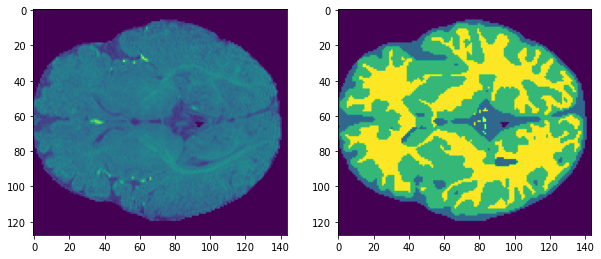

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(np.take(trainx[2], 30, 2))
plt.subplot(122).imshow(np.take(trainy[2],30,2))

### Data Pre-Processing

#### 1. Reshape

In [ ]:
"""import cv2
trainx=trainx[0:7,10:131,25:175,100:200]
print(t.shape)
img=np.take(trainx[0], 100, 2)
print(img.shape)
img1=img[10:130,20:175]
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(img)
plt.subplot(122).imshow(np.take(t[0], 0, 2))
print(img1.shape)
#img=cv2.resize(img,(121,100),interpolation=cv2.INTER_AREA)
#plt.figure(figsize=(5,5))
#plt.imshow(img)
#print(img.shape)

img=np.take(trainx[0], 50, 2)
img=cv2.resize(img,(121,100),interpolation=cv2.INTER_AREA)
plt.figure(figsize=(5,5))
plt.imshow(img)
print(img.shape)"""

'import cv2\ntrainx=trainx[0:7,10:131,25:175,100:200]\nprint(t.shape)\nimg=np.take(trainx[0], 100, 2)\nprint(img.shape)\nimg1=img[10:130,20:175]\nplt.figure(figsize=(10,10))\nplt.subplot(121).imshow(img)\nplt.subplot(122).imshow(np.take(t[0], 0, 2))\nprint(img1.shape)\n#img=cv2.resize(img,(121,100),interpolation=cv2.INTER_AREA)\n#plt.figure(figsize=(5,5))\n#plt.imshow(img)\n#print(img.shape)\n\nimg=np.take(trainx[0], 50, 2)\nimg=cv2.resize(img,(121,100),interpolation=cv2.INTER_AREA)\nplt.figure(figsize=(5,5))\nplt.imshow(img)\nprint(img.shape)'

#### 2. Normalization

In [ ]:
"""
mean = np.mean(trainx)
std  = np.std(trainx)

print(mean)
print(std)

trainx = trainx-mean
trainx = trainx/std

testx = testx-mean
testx = testx/std

validx = validx-mean
validx = validx/std"""

'\nmean = np.mean(trainx)\nstd  = np.std(trainx)\n\nprint(mean)\nprint(std)\n\ntrainx = trainx-mean\ntrainx = trainx/std\n\ntestx = testx-mean\ntestx = testx/std\n\nvalidx = validx-mean\nvalidx = validx/std'

In [ ]:
trainy = trainy.astype('float32')
validy = validy.astype('float32')
testy = testy.astype('float32')
"""trainx = trainx.astype('float32')
validx = validx.astype('float32')
testx = testx.astype('float32')

mean = np.mean(trainx)
std  = np.std(trainx)

print(mean)
print(std)

trainx -= mean
trainx /= std

testx = testx-mean
testx = testx/std

validx = validx-mean
validx = validx/std"""

from keras.utils import to_categorical
trainy = to_categorical(trainy,num_classes=None)

In [ ]:
print(trainy[0,:,:,25])

[[[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 ...

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]]


In [ ]:
trainy = trainy.reshape(6, 128, 144, 128,4) 
trainx=trainx.reshape(6,128,144,128)

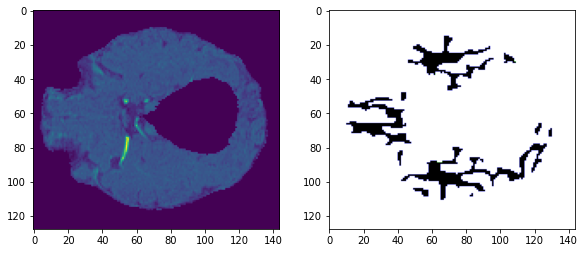

In [ ]:
idxx=2 #1
plt.figure(figsize=(15,15))
plt.subplot(131).imshow(trainx[idxx][:,:,15])
plt.subplot(132).imshow(trainy[idxx][:,:,15])

In [ ]:
print(trainy[0,:,:,25,1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
validy=trainy
testy=trainy

In [ ]:
print(trainx.shape[1],trainx.shape[2],trainx.shape[3])

128 144 128


### Model

In [ ]:
def unet_depth2(input_height=trainx.shape[1], input_width=trainx.shape[2]):

    img_input = Input(shape=(input_height,input_width,trainx.shape[3],1))

    conv1 = Conv3D(16, 3 , padding='same')(img_input)
    conv1=LeakyReLU(alpha=0.3)(conv1)
    conv1 = Conv3D(16, 3 , padding='same')(conv1)
    conv1=LeakyReLU(alpha=0.3)(conv1)
    conv1=BatchNormalization()(conv1)
    pool1 = MaxPooling3D((2, 2,2))(conv1)
    
    conv2 = Conv3D(32, 3, padding='same')(pool1)
    conv2=LeakyReLU(alpha=0.3)(conv2)
    conv2 = Conv3D(32, 3, padding='same')(conv2)
    conv2=LeakyReLU(alpha=0.3)(conv2)
    conv2=BatchNormalization()(conv2)
    pool2 = MaxPooling3D((2, 2,2))(conv2)


    conv3 = Conv3D(64, 3 ,padding='same')(pool2)
    conv3=LeakyReLU(alpha=0.3)(conv3)
    conv3 = Conv3D(64, 3,padding='same')(conv3)
    conv3=LeakyReLU(alpha=0.3)(conv3)
    conv3=BatchNormalization()(conv3)
    pool3 = MaxPooling3D((2, 2,2))(conv3)

    conv4 = Conv3D(128, 3 , padding='same')(pool3)
    conv4=LeakyReLU(alpha=0.3)(conv4)
    conv4 = Conv3D(128, 3, padding='same')(conv4)
    conv4=LeakyReLU(alpha=0.3)(conv4)
    conv4=BatchNormalization()(conv4)
    pool4 = MaxPooling3D((2, 2,2))(conv4)

    conv5 = Conv3D(256, 3 , padding='same')(pool4)
    conv5=LeakyReLU(alpha=0.3)(conv5)
    conv5 = Conv3D(256, 3, padding='same')(conv5)
    conv5=LeakyReLU(alpha=0.3)(conv5)

    conv6 = Conv3D(128, 3, padding='same')(conv5)
    conv6=LeakyReLU(alpha=0.3)(conv6)
    conv6 = Conv3D(128, 3, padding='same')(conv6)
    conv6=LeakyReLU(alpha=0.3)(conv6)
    conv6=BatchNormalization()(conv6)
    up1 = UpSampling3D((2, 2,2))(conv6)
    
    skip1  = concatenate([up1,conv4])
    
    conv7 = Conv3D(64, 3,padding='same')(skip1)
    conv7=LeakyReLU(alpha=0.3)(conv7)
    conv7 = Conv3D(64, 3,padding='same')(conv7)
    conv7=LeakyReLU(alpha=0.3)(conv7)
    conv7=BatchNormalization()(conv7)
    up2 = UpSampling3D((2, 2,2))(conv7)
    
    skip2  = concatenate([up2,conv3])

    conv8 = Conv3D(32, 3,padding='same')(skip2)
    conv8=LeakyReLU(alpha=0.3)(conv8)
    conv8 = Conv3D(32, 3,padding='same')(conv8)
    conv8=LeakyReLU(alpha=0.3)(conv8)
    conv8=BatchNormalization()(conv8)
    up3 = UpSampling3D((2, 2,2))(conv8)
    
    skip3  = concatenate([up3,conv2])

    conv9 = Conv3D(16, 3, padding='same')(skip3)
    conv9=LeakyReLU(alpha=0.3)(conv9)
    conv9 = Conv3D(16, 3, padding='same')(conv9)
    conv9=LeakyReLU(alpha=0.3)(conv9)
    conv9=BatchNormalization()(conv9)
    up4 = UpSampling3D((2, 2,2))(conv9)
    
    skip4  = concatenate([up4,conv1,img_input])
    
    conv10 = Conv3D(8, 3,  padding='same')(skip4)
    conv10=LeakyReLU(alpha=0.3)(conv10)
    conv10 = Conv3D(8, 3, padding='same')(conv10)
    conv10=LeakyReLU(alpha=0.3)(conv10)
    
    drop1 = Dropout(0.5)(conv10)

    o = Conv3D( 4 , 1 ,activation = 'softmax' ,padding='same')(conv10)
    
    model = Model(inputs=[img_input], outputs=[ o ])
    
    return model

model=unet_depth2()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 144, 12 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 144, 128 448         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 144, 128 0           conv3d[0][0]                     
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 128, 144, 128 6928        leaky_re_lu[0][0]                
_______________________________________________________________________________________

### Model Visualization

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
data_gen_args = ImageDataGenerator(featurewise_center=False,
                                 featurewise_std_normalization=False, 
                                 samplewise_center=False,
                                 samplewise_std_normalization=False,
                                 horizontal_flip=True,
                                 zoom_range=[0.8,0.9],
                                 rotation_range=30) 

In [ ]:
image_datagen = ImageDataGenerator(data_gen_args)
mask_datagen = ImageDataGenerator(data_gen_args)

#seed = 2018
bs = 1

In [ ]:
"""image_generator = image_datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=True)
mask_generator = mask_datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=True)

# Just zip the two generators to get a generator that provides augmented images and masks at the same time
train_generator = zip(image_generator, mask_generator)"""

'image_generator = image_datagen.flow(trainx, seed=seed, batch_size=bs, shuffle=True)\nmask_generator = mask_datagen.flow(trainy, seed=seed, batch_size=bs, shuffle=True)\n\n# Just zip the two generators to get a generator that provides augmented images and masks at the same time\ntrain_generator = zip(image_generator, mask_generator)'

### Fine-tuning Tricks (callbacks)

In [ ]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
os.chdir('/content/drive/My Drive/results')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000)
mc = ModelCheckpoint('unet_up2_Aug.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cv = keras.callbacks.CSVLogger('unet_up2_Aug.csv', separator=',', append=False)

### Metrics

In [ ]:
from keras import backend as K
smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2*(intersection + smooth)) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

### Optimizer

In [ ]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10,
    decay_rate=0.9)
#optimizer = keras.optimizers.SGD(learning_rate=lr_schedule,momentum=0.1, nesterov=True,)
#optimizer=keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [ ]:
"""
import keras as K
def weighted_categorical_crossentropy(weights):
    # weights = [0.25,0.25,0.25,0.25]
    def wcce(y_true, y_pred):
        Kweights = K.constant(weights)
        #if not K.is_tensor(y_pred):
        y_pred = K.constant(y_pred)
        y_true = K.cast(y_true, y_pred.dtype)
        return K.categorical_crossentropy(y_true, y_pred) * K.sum(y_true * Kweights, axis=-1)
    return wcce"""

'\nimport keras as K\ndef weighted_categorical_crossentropy(weights):\n    # weights = [0.25,0.25,0.25,0.25]\n    def wcce(y_true, y_pred):\n        Kweights = K.constant(weights)\n        #if not K.is_tensor(y_pred):\n        y_pred = K.constant(y_pred)\n        y_true = K.cast(y_true, y_pred.dtype)\n        return K.categorical_crossentropy(y_true, y_pred) * K.sum(y_true * Kweights, axis=-1)\n    return wcce'

In [ ]:
#loss = weighted_categorical_crossentropy(weights)
#optimizer = keras.optimizers.Adam(lr=0.01)
#model.compile(optimizer=optimizer, loss=loss)

### Compile and Train the Model

In [ ]:
from keras import backend as K
model.compile(loss=dice_coef_loss, optimizer=optimizer, metrics=[dice_coef])

In [ ]:
#from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(trainx,trainy, steps_per_epoch=(len(trainx) //bs),callbacks=[es,mc,cv],epochs=5000,
                              validation_data=(trainx, trainy))

Streaming output truncated to the last 5000 lines.
Epoch 00142: val_loss did not improve from -0.86835
6/6 [==============================] - 6s 938ms/step - loss: -0.8739 - dice_coef: 0.8739 - val_loss: -0.8582 - val_dice_coef: 0.8582
Epoch 143/5000
6/6 [==============================] - ETA: 0s - loss: -0.8738 - dice_coef: 0.8738
Epoch 00143: val_loss did not improve from -0.86835
6/6 [==============================] - 6s 939ms/step - loss: -0.8738 - dice_coef: 0.8738 - val_loss: -0.8652 - val_dice_coef: 0.8652
Epoch 144/5000
6/6 [==============================] - ETA: 0s - loss: -0.8737 - dice_coef: 0.8737
Epoch 00144: val_loss did not improve from -0.86835
6/6 [==============================] - 6s 939ms/step - loss: -0.8737 - dice_coef: 0.8737 - val_loss: -0.8611 - val_dice_coef: 0.8611
Epoch 145/5000
6/6 [==============================] - ETA: 0s - loss: -0.8742 - dice_coef: 0.8742
Epoch 00145: val_loss did not improve from -0.86835
6/6 [==============================] - 6s 941ms/

KeyboardInterrupt: ignored

### Evaluating the Model Performance

In [ ]:
model.evaluate(testx,testy)

1/1 [==============================] - 1s 562ms/step - loss: -0.9626 - dice_coef: 0.9626


[-0.9625598788261414, 0.9625598192214966]

In [ ]:
model.save("unet_up2_aug_temp.h5")

### Load_Model

In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/results')

In [ ]:
from keras.models import load_model
model2 = load_model("unet_up2_Aug.h5", custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})
model2.evaluate(testx,testy)

1/1 [==============================] - 1s 550ms/step - loss: -0.9628 - dice_coef: 0.9628


[-0.9627808928489685, 0.9627808928489685]

In [ ]:
preds = model2.predict(testx, verbose = 1)
preds.shape
preds = np.around(preds)

1/1 [==============================] - 1s 702ms/step


In [ ]:
print(preds.shape)
preds=preds.reshape(6,128,144,128,4)

(6, 128, 144, 128, 4)


In [ ]:
def dice(true, preds):  
    scores  = []
    for i in range(len(true)):
        im1 = true[i]
        im2 = preds[i]
        intersection = np.logical_and(im1, im2)
        score = 2. * intersection.sum() / (im1.sum() + im2.sum())
        scores.append(score)
    return np.array(scores).mean(), scores

In [ ]:
avg_d_score, d_scores = dice(testy, np.around(preds))
print(avg_d_score)

0.962790973963536


In [ ]:
np.mean(d_scores)

0.962790973963536

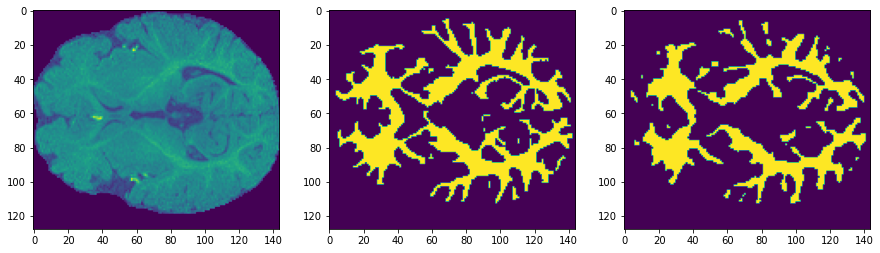

In [ ]:
idxx=0 #1
plt.figure(figsize=(15,15))
plt.subplot(131).imshow(testx[idxx][:,:,30])
plt.subplot(132).imshow(testy[idxx][:,:,30,3])
plt.subplot(133).imshow(preds[idxx][:,:,30,3])

In [ ]:
print(preds[0,:,:,15,3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Plot Loss and Accuracy

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train'])

### Dice Coefficient

In [ ]:
test_pred = model.predict(testx, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
test_result=test_result.reshape(7,128,144,128,4)
dice = dc(test_result, testy)
pre  = precision(test_result,testy)
re   = recall(test_result,testy)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

In [ ]:
np.set_printoptions(threshold=np.inf)
print(preds[0,:,:,25])

In [ ]:
print(trainy[0,:,:,25])

In [ ]:
def get_unet():
    inputs = Input((128,144,128,1))
    conv1 = Conv3D(32, (3, 3,3), activation='relu', padding='same')(inputs)
    conv1 = Conv3D(32, (3, 3,3), activation='relu', padding='same')(conv1)
    conc1 = concatenate([inputs, conv1], axis=4)
    pool1 = MaxPooling3D(pool_size=(2, 2,2))(conc1)

    conv2 = Conv3D(64, (3, 3,3), activation='relu', padding='same')(pool1)
    conv2 = Conv3D(64, (3, 3,3), activation='relu', padding='same')(conv2)
    conc2 = concatenate([pool1, conv2], axis=4)
    pool2 = MaxPooling3D(pool_size=(2, 2,2))(conc2)

    conv3 = Conv3D(128, (3, 3,3), activation='relu', padding='same')(pool2)
    conv3 = Conv3D(128, (3, 3,3), activation='relu', padding='same')(conv3)
    conc3 = concatenate([pool2, conv3], axis=4)
    pool3 = MaxPooling3D(pool_size=(2, 2,2))(conc3)

    conv4 = Conv3D(256, (3, 3,3), activation='relu', padding='same')(pool3)
    conv4 = Conv3D(256, (3, 3,3), activation='relu', padding='same')(conv4)
    conc4 = concatenate([pool3, conv4], axis=4)
    pool4 = MaxPooling3D(pool_size=(2, 2,2))(conc4)

    conv5 = Conv3D(512, (3, 3,3), activation='relu', padding='same')(pool4)
    conv5 = Conv3D(512, (3, 3,3), activation='relu', padding='same')(conv5)
    conc5 = concatenate([pool4, conv5], axis=4)

    up6 = concatenate([Conv3DTranspose(256, (2, 2,2), strides=(2, 2,2), padding='same')(conc5), conv4], axis=4)
    conv6 = Conv3D(256, (3, 3,3), activation='relu', padding='same')(up6)
    conv6 = Conv3D(256, (3, 3,3), activation='relu', padding='same')(conv6)
    conc6 = concatenate([up6, conv6], axis=4)

    up7 = concatenate([Conv3DTranspose(128, (2, 2,2), strides=(2, 2,2), padding='same')(conc6), conv3], axis=4)
    conv7 = Conv3D(128, (3, 3,3), activation='relu', padding='same')(up7)
    conv7 = Conv3D(128, (3, 3,3), activation='relu', padding='same')(conv7)
    conc7 = concatenate([up7, conv7], axis=4)

    up8 = concatenate([Conv3DTranspose(64, (2, 2,2), strides=(2, 2,2), padding='same')(conc7), conv2], axis=4)
    conv8 = Conv3D(64, (3, 3,3), activation='relu', padding='same')(up8)
    conv8 = Conv3D(64, (3, 3,3), activation='relu', padding='same')(conv8)
    conc8 = concatenate([up8, conv8], axis=4)

    up9 = concatenate([Conv3DTranspose(32, (2,2, 2), strides=(2, 2,2), padding='same')(conc8), conv1], axis=4)
    conv9 = Conv3D(32, (3, 3,3), activation='relu', padding='same')(up9)
    conv9 = Conv3D(32, (3, 3,3), activation='relu', padding='same')(conv9)
    conc9 = concatenate([up9, conv9], axis=4)

    conv10 = Conv3D(4, (1, 1,1), activation='softmax')(conc9)

    model = Model(inputs=[inputs], outputs=[conv10])
    
    return model

model=get_unet()
model.summary()

In [ ]:
def unet_depth2(input_height=trainx.shape[1], input_width=trainx.shape[2]):

    img_input = Input(shape=(input_height,input_width,trainx.shape[3],1))

    conv1 = Conv3D(16, 3 , activation='relu', padding='same')(img_input)
    conv1 = Conv3D(16, 3 , activation='relu', padding='same')(conv1)
    pool1 = MaxPooling3D((2, 2,2))(conv1)
    
    conv2 = Conv3D(32, 3 , activation='relu', padding='same')(pool1)
    conv2 = Conv3D(32, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling3D((2, 2,2))(conv2)


    conv3 = Conv3D(64, 3 , activation='relu', padding='same')(pool2)
    conv3 = Conv3D(64, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling3D((2, 2,2))(conv3)

    conv4 = Conv3D(128, 3 , activation='relu', padding='same')(pool3)
    conv4 = Conv3D(128, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling3D((2, 2,2))(conv4)

    conv5 = Conv3D(256, 3 , activation='relu', padding='same')(pool4)
    conv5 = Conv3D(256, 3, activation='relu', padding='same')(conv5)

    conv6 = Conv3D(128, 3, activation='relu', padding='same')(conv5)
    conv6 = Conv3D(128, 3, activation='relu', padding='same')(conv6)
    up1 = UpSampling3D((2, 2,2))(conv6)
    
    skip1  = concatenate([up1,conv4])
    
    conv7 = Conv3D(64, 3, activation='relu', padding='same')(skip1)
    conv7 = Conv3D(64, 3, activation='relu', padding='same')(conv7)
    up2 = UpSampling3D((2, 2,2))(conv7)
    
    skip2  = concatenate([up2,conv3])

    conv8 = Conv3D(32, 3, activation='relu', padding='same')(skip2)
    conv8 = Conv3D(32, 3, activation='relu', padding='same')(conv8)
    up3 = UpSampling3D((2, 2,2))(conv8)
    
    skip3  = concatenate([up3,conv2])

    conv9 = Conv3D(16, 3, activation='relu', padding='same')(skip3)
    conv9 = Conv3D(16, 3, activation='relu', padding='same')(conv9)
    up4 = UpSampling3D((2, 2,2))(conv9)
    
    skip4  = concatenate([up4,conv1,img_input])
    
    conv10 = Conv3D(8, 3, activation='relu', padding='same')(skip4)
    conv10 = Conv3D(8, 3, activation='relu', padding='same')(conv10)
    
    drop1 = Dropout(0.5)(conv10)

    o = Conv3D( 4 , 1 ,activation = 'softmax' ,padding='same')(conv10)
    
    model = Model(inputs=[img_input], outputs=[ o ])
    
    return model

model=unet_depth2()
model.summary()

In [ ]:
def unet_depth2(input_height=trainx.shape[1], input_width=trainx.shape[2]):

    img_input = Input(shape=(input_height,input_width,trainx.shape[3],1))

    conv1 = Conv3D(16, 3 , activation='relu', padding='same')(img_input)
    conv1 = Conv3D(16, 3 , activation='relu', padding='same')(conv1)
    #pool1 = MaxPooling3D((2, 2,2))(conv1)
    
    conv2 = Conv3D(32, 3 , activation='relu', padding='same')(conv1)
    conv2 = Conv3D(32, 3, activation='relu', padding='same')(conv2)
    #pool2 = MaxPooling3D((2, 2,2))(conv2)


    conv3 = Conv3D(64, 3 , activation='relu', padding='same')(conv2)
    conv3 = Conv3D(64, 3, activation='relu', padding='same')(conv3)
    #pool3 = MaxPooling3D((2, 2,2))(conv3)

    
    skip1  = concatenate([conv3,conv2])
    
    conv7 = Conv3D(64, 3, activation='relu', padding='same')(skip1)
    conv7 = Conv3D(64, 3, activation='relu', padding='same')(conv7)
    #up2 = UpSampling3D((2, 2,2))(conv7)
    
    skip2  = concatenate([conv7,conv1,img_input])

    
    conv10 = Conv3D(8, 3, activation='relu', padding='same')(skip2)
    conv10 = Conv3D(8, 3, activation='relu', padding='same')(conv10)
    
    drop1 = Dropout(0.5)(conv10)

    o = Conv3D( 4 , 1 ,activation = 'softmax' ,padding='same')(conv10)
    
    model = Model(inputs=[img_input], outputs=[ o ])
    
    return model

model=unet_depth2()
model.summary()

In [ ]:
def unet_depth2(input_height=trainx.shape[1], input_width=trainx.shape[2]):

    img_input = Input(shape=(input_height,input_width,trainx.shape[3],1))

    conv1 = Conv3D(16, 3 , activation='relu', padding='same')(img_input)
    conv11 = Conv3D(16, 3 , activation='relu', padding='same')(img_input)
    conv1=concatenate([conv11,conv1])
    pool1 = MaxPooling3D((2, 2,2))(conv1)
    
    conv2 = Conv3D(16, 3 , activation='relu', padding='same')(pool1)
    conv22 = Conv3D(16, 3, activation='relu', padding='same')(pool1)
    conv2=concatenate([conv22,conv2])
    pool2 = MaxPooling3D((2, 2,2))(conv2)


    conv3 = Conv3D(16, 3 , activation='relu', padding='same')(pool2)
    conv33 = Conv3D(16, 3, activation='relu', padding='same')(pool2)
    conv3=concatenate([conv33,conv3])
    pool3 = MaxPooling3D((2, 2,2))(conv3)

    conv4 = Conv3D(16, 3 , activation='relu', padding='same')(pool3)
    conv44 = Conv3D(16, 3, activation='relu', padding='same')(pool3)
    conv4=concatenate([conv44,conv4])
    pool4 = MaxPooling3D((2, 2,2))(conv4)

    conv5 = Conv3D(16, 3 , activation='relu', padding='same')(pool4)
    conv55 = Conv3D(16, 3, activation='relu', padding='same')(pool4)
    conv5=concatenate([conv55,conv5])

    conv6 = Conv3D(16, 3, activation='relu', padding='same')(conv5)
    conv66 = Conv3D(16, 3, activation='relu', padding='same')(conv5)
    conv6=concatenate([conv66,conv6])
    up1 = UpSampling3D((2, 2,2))(conv6)
    
    skip1  = concatenate([up1,conv4])
    
    conv7 = Conv3D(16, 3, activation='relu', padding='same')(skip1)
    conv77 = Conv3D(16, 3, activation='relu', padding='same')(skip1)
    conv7=concatenate([conv77,conv7])
    up2 = UpSampling3D((2, 2,2))(conv7)
    
    skip2  = concatenate([up2,conv3])

    conv8 = Conv3D(16, 3, activation='relu', padding='same')(skip2)
    conv88 = Conv3D(16, 3, activation='relu', padding='same')(skip2)
    conv8=concatenate([conv88,conv8])
    up3 = UpSampling3D((2, 2,2))(conv8)
    
    skip3  = concatenate([up3,conv2])

    conv9 = Conv3D(16, 3, activation='relu', padding='same')(skip3)
    conv99 = Conv3D(16, 3, activation='relu', padding='same')(skip3)
    conv9=concatenate([conv99,conv9])
    up4 = UpSampling3D((2, 2,2))(conv9)
    
    skip4  = concatenate([up4,conv1,img_input])
    
    conv10 = Conv3D(16, 3, activation='relu', padding='same')(skip4)
    conv100 = Conv3D(16, 3, activation='relu', padding='same')(skip4)
    conv10=concatenate([conv100,conv10])
    
    drop1 = Dropout(0.5)(conv10)

    o = Conv3D( 4 , 1 ,activation = 'softmax' ,padding='same')(conv10)
    
    model = Model(inputs=[img_input], outputs=[ o ])
    
    return model

model=unet_depth2()
model.summary()